In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startups=pd.read_csv("E:/DataSet/50_Startups.csv")
startups.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
start=startups.drop("State", axis=1, inplace=False)
RD_Spend=start["R&D_Spend"]

In [4]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
start.isna().sum() #checking for null values

R&D_Spend          0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [6]:
start.corr() #correlation matrix

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


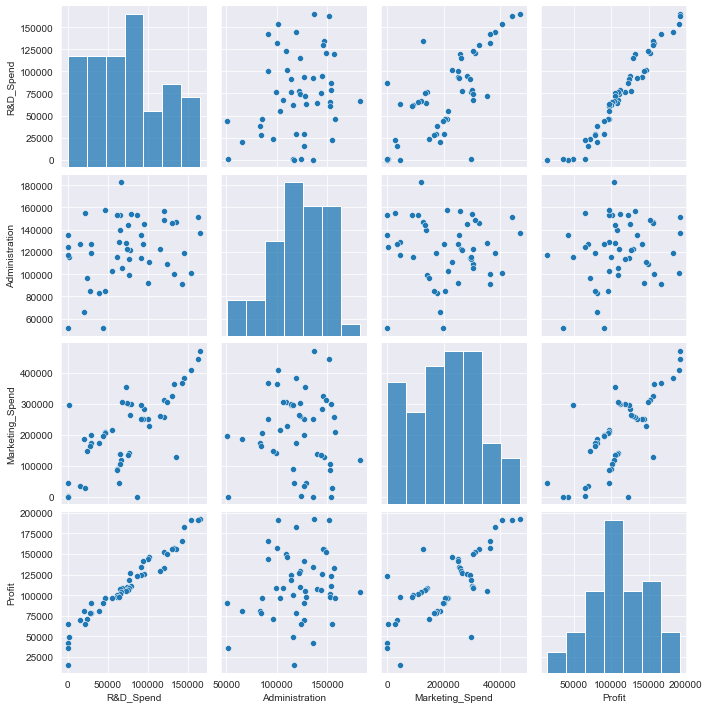

In [7]:
sns.set_style(style="darkgrid")
sns.pairplot(start)

In [8]:
model=smf.ols("Profit~RD_Spend+Marketing_Spend+Administration", data=start).fit()
model.params

Intercept          50122.192990
RD_Spend               0.805715
Marketing_Spend        0.027228
Administration        -0.026816
dtype: float64

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           4.53e-30
Time:                        00:20:21   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Marketing_Spend     1.655077
Administration     -0.525507
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Marketing_Spend    1.047168e-01
Administration     6.017551e-01
dtype: float64


# Simple Linear Models

In [12]:
m_rd=smf.ols("Profit~RD_Spend", data=start).fit()
m_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.50e-32
Time:                        00:22:50   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
m_admi=smf.ols("Profit~Administration", data=start).fit()
m_admi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 28 Jan 2021   Prob (F-statistic):              0.162
Time:                        00:22:53   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
m_mark=smf.ols("Profit~Marketing_Spend", data=start).fit()
m_mark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        00:22:56   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [15]:
rsq_RD= smf.ols("RD_Spend~Administration+Marketing_Spend", data=start).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_mark=smf.ols("Marketing_Spend~RD_Spend+Administration", data=start).fit().rsquared
vif_mark=1/(1-rsq_mark)

rsq_admin=smf.ols("Administration~RD_Spend+Marketing_Spend", data=start).fit().rsquared
vif_admin=1/(1-rsq_admin)

D={"Variables":['RD_Spend', 'Marketing_Spend', 'Administration'], 'VIF':[vif_RD,vif_mark,vif_admin]}
VIF_frame=pd.DataFrame(D)
VIF_frame

,Variables,VIF
0,RD_Spend,2.468903
1,Marketing_Spend,2.326773
2,Administration,1.175091


# Q-Q Plot

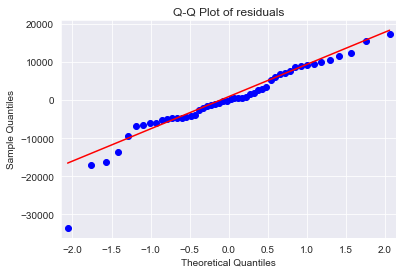

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')
plt.title("Q-Q Plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid>5))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [18]:
def get_Zscores(vals):
    return (vals-vals.mean()/vals.std()) #a function to get the Z-scores

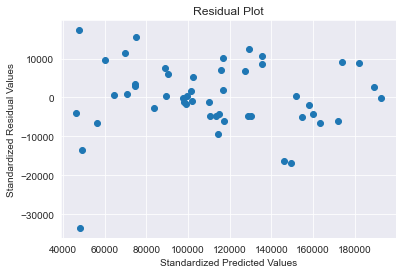

In [19]:
plt.scatter(get_Zscores(model.fittedvalues),
            get_Zscores(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show() #Plot for homoscedasity                                     

## Cook's Distance

In [20]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

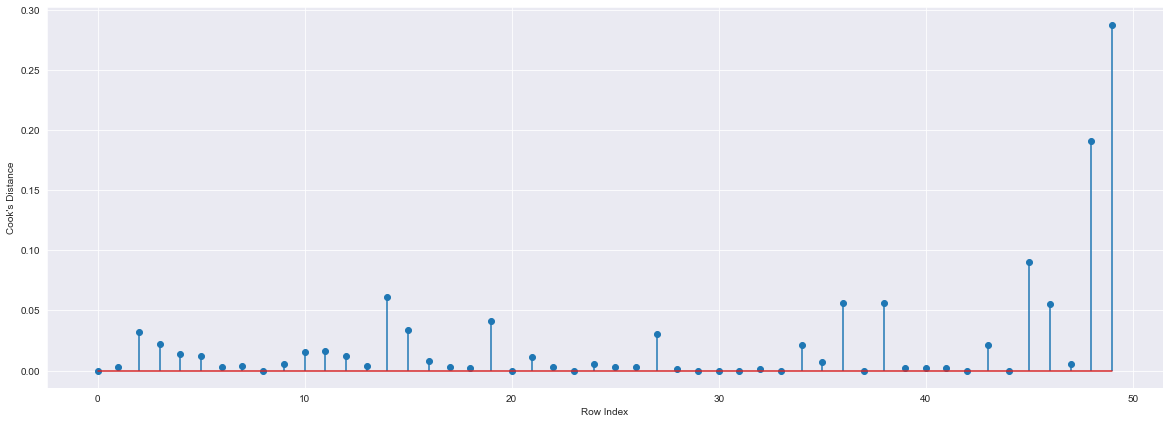

In [22]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start)), np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.show() #plotting the outliers

In [23]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543277)

## High Influence Points

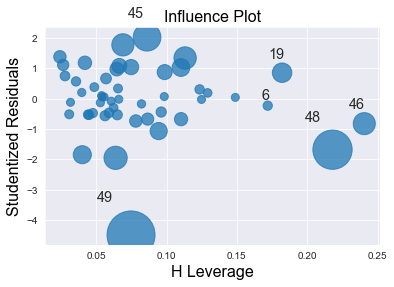

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [25]:
k=start.shape[1]
n=start.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [26]:
#from the influence plot is it clear that observations 46 and 48 are outliers
start[start.index.isin([46,48])]

,R&D_Spend,Administration,Marketing_Spend,Profit
46,1315.46,115816.21,297114.46,49490.75
48,542.05,51743.15,0.00,35673.41


In [27]:
start.head() #hence it can be seen clearly that these two values are outliers

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Improving the model

In [49]:
#discarding the outlier data points
start_new=start.drop(start.index[[46,48]], axis=0).reset_index()
R_Spend=start_new["R&D_Spend"]

In [50]:
start_new

,index,R&D_Spend,Administration,Marketing_Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [51]:
start_new=start_new.drop(['index'], axis=1) #dropping the original index

## Building the new model

In [52]:
#Now we exclude the Marketing_Spend column and create the model.
model2=smf.ols("Profit~Administration+R_Spend", data=start_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     388.1
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           4.19e-29
Time:                        01:11:11   Log-Likelihood:                -504.64
No. Observations:                  48   AIC:                             1015.
Df Residuals:                      45   BIC:                             1021.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.014e+04   6449.144      9.325      0.000    4.72e+04    7.31e+04
Administration    -0.0860      0.051     -1.685      0.099      -0.189       0.017
R_Spend            0.8512      0.031     27.686      0.000       0.789       0.913
==============================================================================
Omnibus:                       19.466   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.340
Skew:                          -1.150   Prob(JB):                     2.12e-08
Kurtosis:                       6.518   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model2_influence=model2.get_influence()
(c_V, _)=model2_influence.cooks_distance

Text(0, 0.5, "Cook's Distance")

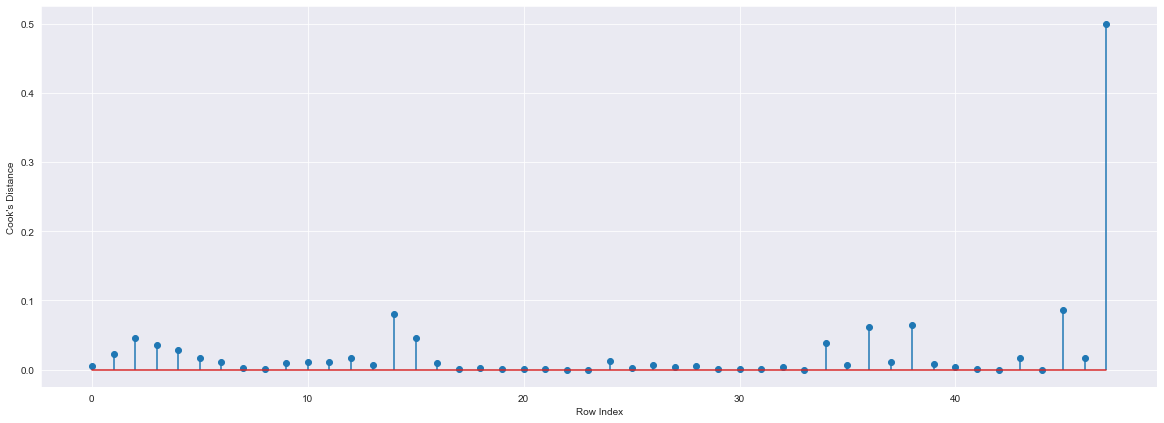

In [54]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start_new)), np.round(c_V,3))
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")

In [55]:
(np.argmax(c_V), np.max(c_V)) #index of data points where c value is greater than 0.5

(47, 0.5002757223125487)

In [59]:
print(model.rsquared, model.aic)

0.9507459940683246 1058.7714985998055


In [60]:
print(model2.rsquared, model2.aic)
#hence we can see that AIC of model 2 is lower than model 1 thus we can conclude that model 2 is better than model 1

0.9452001414842283 1015.2824625842915
